# **How much did Stephen Curry change the game of basketball?**

### Tutorial: Analysis on NBA statistics

Joonkyu Sok\
CMSC320\
Final Project\
December 16, 2022\

### **1. Introduction**
Stephen Curry is known as the greatest shooter of all time in the game of basketball. Not only did he win 4 championships throughout his career with multiple accolades, but he also is named as the primary reason of how the modern basketball game has formed. More specifically, how important the 3 point shot has become. For those who don't know basketball, a 3 point shot is a long distance shot from behind the 'arc' (3 point line) that gives an extra point than the regular 2 point shot which is inside the 'arc'. In the past, especially in the 90s, the 3 point shot was never prioritized as tall centers were the primary scorers who usually shot close ranged. A prime example of how the game was played back then is seen through (now retired) Kareem Abdul Jabbar who has currently the most points in NBA history, but only shot 1 3-point shot. In this tutorial, we would like to analyze just how much of an effect Stephen Curry had on today's game of basketball by looking at the nba statistics from the years 1991-2022.


### **2. Data of Teams**

We will start by importing all the necessary Python packages that will help us load/scrape and wrangle data from the website: [Link to basketball reference](https://www.basketball-reference.com/)
* [requests](https://pypi.org/project/requests/): this is a package that will allow us to get the html data of a specific url necessary for website scraping
* [time](https://realpython.com/python-time-module/): this package will allow us to request html texts from websites in intervals to avoid overloading the website server
* [BeautifulSoup](https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/): this package will allow us to parse the html page we recieved from requests in order to find a specific table in the page we want
* [pandas](https://pypi.org/project/pandas/): this package will allow us the create dataframes in order to perform different data analysis

In [25]:
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd
years = list(range(1991, 2023))

We will first set a list of years that we want to scrape from the basketball reference website

In [45]:
url_start = "https://www.basketball-reference.com/leagues/NBA_{}.html"

Then we will use formatting "{}" in the url so that we are able to input years we want

In [46]:
for year in years:
    url = url_start.format(year)
    time.sleep(3)
    data = requests.get(url)
    with open("season/{}.html".format(year), "w+") as f:
        f.write(data.text)       

Once we have the formatted url, using the .format method, we can now get the url of every year within the for loop. Using the requests library we will then save the html into the variable 'data' and write it to a file with the year as its name.

In [4]:
dfs = []
for year in years:
    with open("season/{}.html".format(year)) as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    season_table = soup.find(id="switcher_totals_team-opponent")
    season = pd.read_html(str(season_table))[0]
    season["Year"] = year
    dfs.append(season)
seasons = pd.concat(dfs)

The next step is to then use BeautifulSoup to parse the html page we saved so that we can find the specific table in the html page. We want the table with all the teams in that season and their stats. To see which part of the html is the table we want, we can inspect the website opening the source html and hover over the elements until we see our table highlighted. Then using the unique 'id' element of the table we will be able to find it using the .find method of BeautifulSoup. In our case the id was "switcher_totals_team-opponent." We then use pandas to turn the html table into a dataframe. Because we are for looping for each year, we need a column that indicates which year we are in so that when we combine all the dataframes we aren't confused which year is which. Lastly using .concat method, we can combine the list of data frames into 1 big dataframe of all the years.

### Data Cleaning
Just a quick data cleaning of getting rid of the astericks from each team names and also dropping the last row which is NaN of the averages of the whole season.

In [8]:
seasons["Team"] = seasons["Team"].apply(lambda x:  x[:len(x)-1] if x[-1] == '*' else x)
seasons = seasons.dropna()
seasons.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1.0,Denver Nuggets,82,19730,3901,8868,0.440,300,1059,0.283,...,1520,2530,4050,2005,856,406,1332,2235,9828,1991
1,2.0,Golden State Warriors,82,19805,3566,7346,0.485,270,801,0.337,...,1113,2306,3419,1954,803,378,1359,2207,9564,1991
2,3.0,Portland Trail Blazers,82,19905,3577,7369,0.485,341,904,0.377,...,1202,2561,3763,2254,724,410,1309,1975,9407,1991
3,4.0,Phoenix Suns,82,19730,3573,7199,0.496,138,432,0.319,...,1132,2598,3730,2209,687,535,1302,1850,9348,1991
4,5.0,Indiana Pacers,82,19805,3450,6994,0.493,249,749,0.332,...,1018,2376,3394,2181,658,357,1355,2088,9159,1991


Another crucial dataset to our tutorial is the mean of all the teams for each year. We will perform this calculation using groupby with variable 'Year' and returning it into a new dataframe.

In [9]:
season_total = seasons.groupby(by = "Year").mean()
season_total.head()

,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Year,,,,,,,,,,,,,,,,,,,,,
1991,14.0,82.0,19824.444444,3390.777778,7150.333333,0.474667,187.222222,585.629630,0.314630,3203.555556,...,0.764148,1146.629630,2400.629630,3547.259259,2028.962963,704.222222,430.518519,1315.370370,1900.148148,8717.407407
1992,14.0,82.0,19826.296296,3384.111111,7162.629630,0.472407,206.925926,625.851852,0.325407,3177.185185,...,0.758333,1177.296296,2403.444444,3580.740741,2007.111111,708.555556,452.444444,1275.185185,1823.222222,8635.370370
1993,14.0,82.0,19820.740741,3335.407407,7047.962963,0.473370,246.962963,734.222222,0.331259,3088.444444,...,0.754259,1130.962963,2406.222222,3537.185185,2026.111111,701.185185,428.074074,1304.814815,1898.851852,8632.333333
1994,14.0,82.0,19770.740741,3224.592593,6924.111111,0.465778,270.407407,811.370370,0.332185,2954.185185,...,0.734222,1136.555556,2389.074074,3525.629630,2000.111111,727.851852,428.851852,1312.000000,1817.592593,8323.592593
1995,14.0,82.0,19837.407407,3115.000000,6682.333333,0.466296,450.111111,1255.148148,0.358741,2664.888889,...,0.736630,1069.555556,2338.074074,3407.629630,1915.888889,678.888889,423.333333,1307.518519,1924.481481,8315.481481


### **2.1 Data for Stephen Curry**

So far we were able to scrape the data for all the teams for years 1991-2022. Now we want some data for the players. Using Selenium would be most optimal to scrape the over 300 NBA players, however, due to technical difficulties with finding chrome binary, we will be using a csv file from year 2015. The year 2015 was chosen because it was the first breakthrough year for Stephen Curry, winning his unanimous MVP title and his first NBA championship. Thus we will see just how he was able to achieve this using his sharp shooter skills.

In [26]:
url = 'https://raw.githubusercontent.com/jsok59/CMSC320/main/2015players.csv'
season2015 = pd.read_csv(url,index_col=0)
season2015.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
Rk,,,,,,,,,,,,,,,,,,,,,
1,Quincy Acy,PF,24,NYK,68,22,1287,152,331,0.459,...,79,222,301,68,27,22,60,147,398,acyqu01
2,Jordan Adams,SG,20,MEM,30,0,248,35,86,0.407,...,9,19,28,16,16,7,14,24,94,adamsjo01
3,Steven Adams,C,21,OKC,70,67,1771,217,399,0.544,...,199,324,523,66,38,86,99,222,537,adamsst01
4,Jeff Adrien,PF,28,MIN,17,0,215,19,44,0.432,...,23,54,77,15,4,9,9,30,60,adrieje01
5,Arron Afflalo,SG,29,TOT,78,72,2502,375,884,0.424,...,27,220,247,129,41,7,116,167,1035,afflaar01


First convert the csv format from the website into a csv file by using Notebook and saving as .csv. Then use github to upload the csv file so that the url of the raw data can be used to read the csv through pandas library.

### **2.2 Data for 2015 Standings**

Now that we have the stats of all the players in 2015, we would like to see what the standings were in that regular season to compare the stats of the good teams vs the bad teams and see if there are any correlation between the 3 point statistics and their win rate.

In [49]:
url = 'https://raw.githubusercontent.com/jsok59/CMSC320/main/2015standing.csv'
standing2015 = pd.read_csv(url,index_col=0)
standing2015.head()

,Team,Overall,Home,Road,E,W,A,C,SE,NW,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
Rk,,,,,,,,,,,,,,,,,,,,,
1,Golden State Warriors,67-15,39-2,28-13,25-5,42-10,9-1,7-3,9-1,15-3,...,25-6,5-3,45-9,1-0,13-2,11-3,12-3,8-3,16-2,6-2
2,Atlanta Hawks,60-22,35-6,25-16,38-14,22-8,12-6,14-4,12-4,8-2,...,17-11,6-4,30-10,0-1,9-5,14-2,17-0,7-4,9-7,4-3
3,Houston Rockets,56-26,30-11,26-15,23-7,33-19,9-1,8-2,6-4,15-3,...,20-9,8-4,31-14,2-0,11-4,9-5,11-6,7-3,10-6,6-2
4,Los Angeles Clippers,56-26,30-11,26-15,19-11,37-15,7-3,6-4,6-4,15-3,...,21-7,3-5,33-9,2-0,9-5,11-6,11-4,5-6,11-5,7-0
5,Memphis Grizzlies,55-27,31-10,24-17,20-10,35-17,8-2,5-5,7-3,13-5,...,16-13,9-3,26-13,2-0,13-2,8-6,12-4,7-4,9-8,4-3


The same method was used as getting the players data.

In [48]:
top_five = []
for i in range(1,6):
    top_five.append(standing2015['Team'][i])
print(top_five)

bottom_five = []
for i in range(26,31):
    bottom_five.append(standing2015['Team'][i])
print(bottom_five)


['Golden State Warriors', 'Atlanta Hawks', 'Houston Rockets', 'Los Angeles Clippers', 'Memphis Grizzlies']
['Orlando Magic', 'Los Angeles Lakers', 'Philadelphia 76ers', 'New York Knicks', 'Minnesota Timberwolves']


We used a for loop to get the bottom and top 5 of the 2015 regular season. We will use this later in our data exploration to compare the difference between the top 5 teams vs bottom 5 teams in terms of their 3-point statistics.

### **3. Data Exploration**

After we have obtained all our datas and stored them in dataframes, let's see if we can explore some of this data.
First let's see the general trend of the statistics related to the 3-point shot throughout the years 1991-2022.
We will focus mainly on these 3 stats:
* 3P: This stat is how many 3 -point shot was made
* 3PA: This stat is how many 3-point shot was attempted
* 3P%: This stat is 3P/3PA, thus showing the percentage of 3-point shots made

<function matplotlib.pyplot.show(close=None, block=None)>

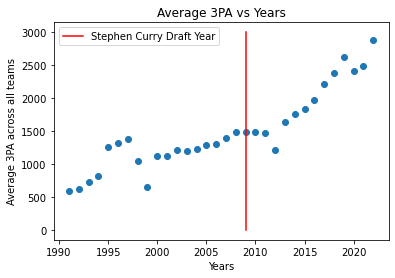

In [37]:
import matplotlib.pyplot as plt
ax = plt.axes()
ax.scatter(years, season_total["3PA"])
ax.plot([2009,2009],[0,3000], color = "red", label ="Stephen Curry Draft Year")
plt.xlabel("Years")
plt.ylabel("Average 3PA across all teams")
plt.title("Average 3PA vs Years")
plt.legend()
plt.show

To see a general trend, a scatter plot would be best. We ploted all the 3PA averages across all teams through the years 1991-2022. In order to see the effect of Stephen Curry, we added the red line on the 2009 season Stephen Curry was drafted to the Golden State Warriors. From a glance we can see that even before Stephen Curry was drafted there was a slightly increasing trend of the 3PA. This means that more players were attempting to shoot 3-point shot across all 30 teams. We can also see that after Stephen Curry joined the league, there is a steeper increase in the 3-point attempts.

<function matplotlib.pyplot.show(close=None, block=None)>

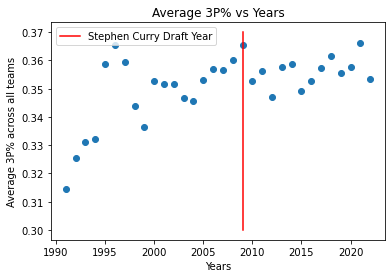

In [51]:
ax = plt.axes()
ax.scatter(years, season_total["3P%"])
ax.plot([2009,2009],[0.3,0.37], color= "red", label = "Stephen Curry Draft Year")
plt.xlabel("Years")
plt.ylabel("Average 3P% across all teams")
plt.title("Average 3P% vs Years")
plt.legend()
plt.show

Let's track another stat, the 3P%, to see if the efficiency also increased in respect to years. This can also be understood as, did the skills of the players increase in terms of shooting 3-pointers. Interestingly, the correlation between the 3P% vs Year and even the effect Steph Curry had on the 3P% is not so clear. However, we can definitely see that compared to the early 90s, the 3P% efficiency has increased drastically, especially on top of the fact that much more 3-point attempts are being made in the modern era.

### **3.1 Stephen Curry vs Others**

Basketball has always been evolving throughout the years. Starting with Kareem's 'skyhook' shot to the now Stephen Curry's limitless range of 3-point shot. What makes these shots so iconic and transformative? Well, one thing that everyone strives for is winning in basketball and a common thing that both Kareem and Stephen has is that they are two of the few legends with 4 championships or more. It only makes sense that players would try to mimic these skills that lead the two to so many championships. A good example is Magic Johnson and Kobe Bryant. Magic copied the 'sky hook' shot from Kareem and Kobe copied the 'fadeaway' from Michael Jordan. It only makes sense that players are now attempting more 3-point shots seeing how dominant Stephen Curry is.

## How great of a shooter is Stephen Curry?

Let's try to use our data on the season 2015 to see just how good Stephen Curry was. First lets get the Stephen Curry's stat from the 2015 players data frame.

In [53]:
sc_30 = season2015.loc[season2015['Player'] == "Stephen Curry"]
sc_30

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
Rk,,,,,,,,,,,,,,,,,,,,,
112,Stephen Curry,PG,26,GSW,80,80,2613,653,1341,0.487,...,56,285,341,619,163,16,249,158,1900,curryst01


In [55]:
season2015_name = season2015.set_index("Player")
print(len(season2015_name))
season2015_name.head()

651


,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
Player,,,,,,,,,,,,,,,,,,,,,
Quincy Acy,PF,24,NYK,68,22,1287,152,331,0.459,18,...,79,222,301,68,27,22,60,147,398,acyqu01
Jordan Adams,SG,20,MEM,30,0,248,35,86,0.407,10,...,9,19,28,16,16,7,14,24,94,adamsjo01
Steven Adams,C,21,OKC,70,67,1771,217,399,0.544,0,...,199,324,523,66,38,86,99,222,537,adamsst01
Jeff Adrien,PF,28,MIN,17,0,215,19,44,0.432,0,...,23,54,77,15,4,9,9,30,60,adrieje01
Arron Afflalo,SG,29,TOT,78,72,2502,375,884,0.424,118,...,27,220,247,129,41,7,116,167,1035,afflaar01


Now we have Stephen Curry's stat, let's delete his row from the players stat table by indexing through the name and deleting his row by using his name

In [57]:
season2015_name = season2015_name.drop("Stephen Curry")
print(len(season2015_name))

650


<function matplotlib.pyplot.show(close=None, block=None)>

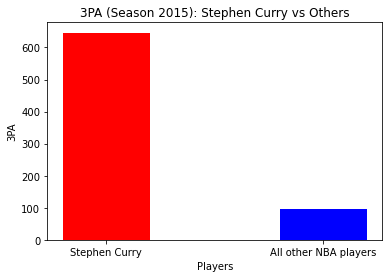

In [62]:
ax = plt.axes()
ax.bar(sc_30['Player'], sc_30['3PA'], color ="red", width = 0.4)
ax.bar("All other NBA players", season2015['3PA'].mean(), color ="blue", width = 0.4)
plt.xlabel("Players")
plt.ylabel("3PA")
plt.title("3PA (Season 2015): Stephen Curry vs Others")
plt.show

In this graph Stephen Curry attempted more than 500 times more than the average nba player.

<function matplotlib.pyplot.show(close=None, block=None)>

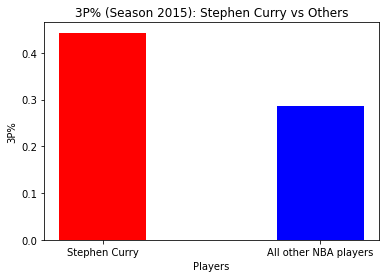

In [63]:
ax = plt.axes()
ax.bar(sc_30['Player'], sc_30['3P%'], color ="red", width = 0.4)
ax.bar("All other NBA players", season2015['3P%'].mean(), color ="blue", width = 0.4)
plt.xlabel("Players")
plt.ylabel("3P%")
plt.title("3P% (Season 2015): Stephen Curry vs Others")
plt.show

In this graph Stephen Curry is over 10% high in his 3P% than the average player

### Unfair Comparison: Because our data contains multiple positions such as Centers who rarely take 3 pointers let's only use players that are shooting guards. In addition, to avoid bench players and short-term contract players who have limited games, let's only compare those who played in 50 games or more.
First let's get a new dataframe with only shooting guards and also only players who played in more than 50 games

In [71]:
sg_2015 = season2015.loc[(season2015['Pos'] == "SG") & (season2015['G'] >= 50)]
sg_2015.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
Rk,,,,,,,,,,,,,,,,,,,,,
5,Arron Afflalo,SG,29,TOT,78,72,2502,375,884,0.424,...,27,220,247,129,41,7,116,167,1035,afflaar01
5,Arron Afflalo,SG,29,DEN,53,53,1750,281,657,0.428,...,21,159,180,101,32,5,83,108,771,afflaar01
11,Tony Allen,SG,33,MEM,63,41,1648,225,455,0.495,...,103,177,280,86,129,30,86,166,539,allento01
15,Alan Anderson,SG,32,BRK,74,19,1744,195,440,0.443,...,31,173,204,83,56,5,60,148,545,anderal01
18,Giannis Antetokounmpo,SG,20,MIL,81,71,2541,383,780,0.491,...,100,442,542,207,73,85,173,254,1030,antetgi01


<function matplotlib.pyplot.show(close=None, block=None)>

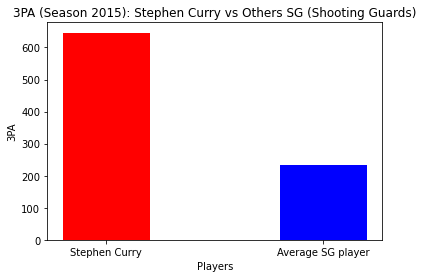

In [75]:
ax = plt.axes()
ax.bar(sc_30['Player'], sc_30['3PA'], color ="red", width = 0.4)
ax.bar("Average SG player", sg_2015['3PA'].mean(), color ="blue", width = 0.4)
plt.xlabel("Players")
plt.ylabel("3PA")
plt.title("3PA (Season 2015): Stephen Curry vs Others SG (Shooting Guards)")
plt.show

As you can see, the amount of 3-point attempts that Steph Curry takes is staggering even compared to other players of the same position. It was unpredecented, how many 3-point attempts Steph would try every game.

<function matplotlib.pyplot.show(close=None, block=None)>

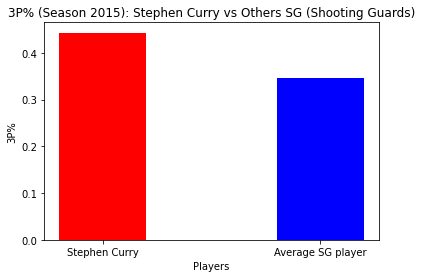

In [76]:
ax = plt.axes()
ax.bar(sc_30['Player'], sc_30['3P%'], color ="red", width = 0.4)
ax.bar("Average SG player", sg_2015['3P%'].mean(), color ="blue", width = 0.4)
plt.xlabel("Players")
plt.ylabel("3P%")
plt.title("3P% (Season 2015): Stephen Curry vs Others SG (Shooting Guards)")
plt.show

The 3P% is still higher than 5% compared to other shooting gaurds. Although it is not as high as the 10% we got previously from comparing ALL nba players, in terms of basketball analytics 5% difference in 3P% is still very significant considering the fact that Stephen Curry takes more than double 3-point shots than the average shooting guard.

### Now that we saw just how dominant Stephen Curry was in the 3-point range, let's see if this correlates to winning
We understand that the Golden State Warriors with Stephen Curry as the leader won the championship in 2015, but how well did the other teams do in correlation to their 3-point statistics

In the next block of codes, we will extract the specific data we want using the top_five and bottom_five array list of teams we created in beforehand. Using a for loop we will get 3P%, 3PA, and 3P of the 10 teams and store them in the array list.

In [110]:
tPA_top5 = []
for team in top_five:
    value = seasons.loc[(seasons['Team'] == team) & (seasons['Year'] == 2015)]['3PA'].values
    tPA_top5.append(value[0])
tPA_top5

[2217, 2152, 2680, 2202, 1246]

This is the 3PA of the top 5 teams in 2015

In [122]:
tPP_top5 = []
for team in top_five:
    value = seasons.loc[(seasons['Team'] == team) & (seasons['Year'] == 2015)]['3P%'].values
    tPP_top5.append(value[0])
tPP_top5

[0.398, 0.38, 0.348, 0.376, 0.339]

This is the 3P% of the top 5 teams in 2015

In [125]:
tP_top5 = []
for team in top_five:
    value = seasons.loc[(seasons['Team'] == team) & (seasons['Year'] == 2015)]['3P'].values
    tP_top5.append(value[0])
tP_top5

[883, 818, 933, 827, 423]

This is the 3P of the top 5 teams in 2015

In [111]:
tPA_bot5 = []
for team in bottom_five:
    value = seasons.loc[(seasons['Team'] == team) & (seasons['Year'] == 2015)]['3PA'].values
    tPA_bot5.append(value[0])
tPA_bot5

[1598, 1546, 2160, 1614, 1223]

This is the 3PA of the bottom 5 teams in 2015

In [123]:
tPP_bot5 = []
for team in bottom_five:
    value = seasons.loc[(seasons['Team'] == team) & (seasons['Year'] == 2015)]['3P%'].values
    tPP_bot5.append(value[0])
tPP_bot5

[0.347, 0.344, 0.32, 0.347, 0.332]

This is the 3P% of the bottom 5 teams in 2015

In [127]:
tP_bot5 = []
for team in bottom_five:
    value = seasons.loc[(seasons['Team'] == team) & (seasons['Year'] == 2015)]['3P'].values
    tP_bot5.append(value[0])
tP_bot5

[554, 532, 692, 560, 406]

This is the 3P of the bottom 5 teams in 2015

Not that we have all the necessary data for the 10 teams, lets plot it using a colored scatter plot to see if there was any correlation in the 3-point statistics and what ranks they were placed.

<function matplotlib.pyplot.show(close=None, block=None)>

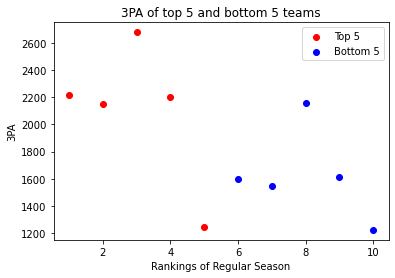

In [121]:
ax = plt.axes()
ax.scatter([1,2,3,4,5], tPA_top5, color = "red", label = "Top 5")
ax.scatter([6,7,8,9,10], tPA_bot5, color = "blue", label = "Bottom 5")
plt.xlabel("Rankings of Regular Season")
plt.ylabel("3PA")
plt.title("3PA of top 5 and bottom 5 teams")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

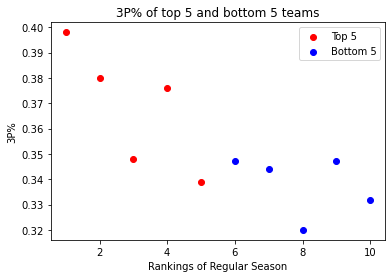

In [124]:
ax = plt.axes()
ax.scatter([1,2,3,4,5], tPP_top5, color = "red", label = "Top 5")
ax.scatter([6,7,8,9,10], tPP_bot5, color = "blue", label = "Bottom 5")
plt.xlabel("Rankings of Regular Season")
plt.ylabel("3P%")
plt.title("3P% of top 5 and bottom 5 teams")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

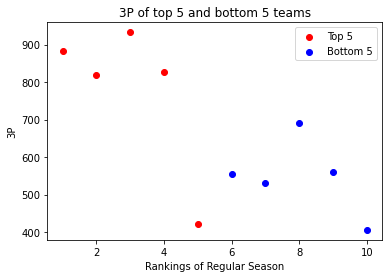

In [128]:
ax = plt.axes()
ax.scatter([1,2,3,4,5], tP_top5, color = "red", label = "Top 5")
ax.scatter([6,7,8,9,10], tP_bot5, color = "blue", label = "Bottom 5")
plt.xlabel("Rankings of Regular Season")
plt.ylabel("3P")
plt.title("3P of top 5 and bottom 5 teams")
plt.legend()
plt.show

From these graphs we can definitely see that the top teams generally have more 3-points made than the bottom teams. There is the one outlier where the 5th ranked team who were the Memphis Grizzlies had almost the same 3 points made as the lowest ranked team. This shows that although the top 4 teams all had higher 3 points made than the bottom 5, there are some 
